In [1]:
#https://github.com/jbn/IPlantUML
import iplantuml

## Revisit ICP

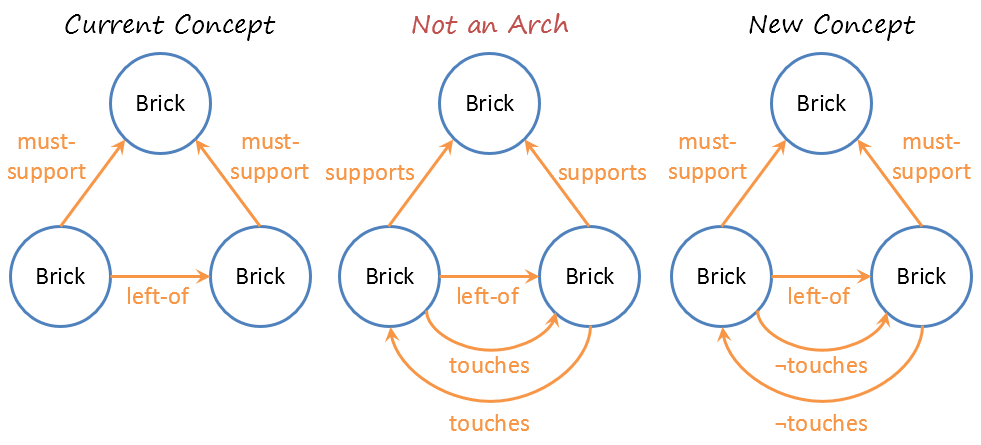

* Order was important
* Starts with positive example
* Each example can vary only in one important feature
* How far to generalize? Its usualy to over generalize or under generalize in ICP
* What if examples come in arbitrary order, and lack of bg knowledge. 

Version spaces help here. 





## Abstract Version Spaces

This is how we converge as a process. 

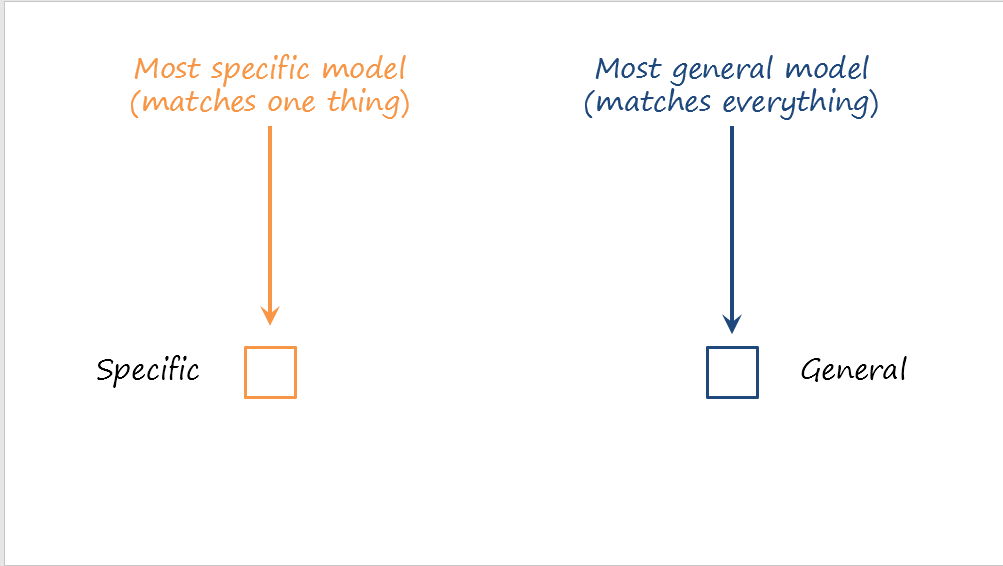

## Visualizing

**ICP** We take one positive model, and that moves towards speciality or generality extremes like below depending on order of example. 

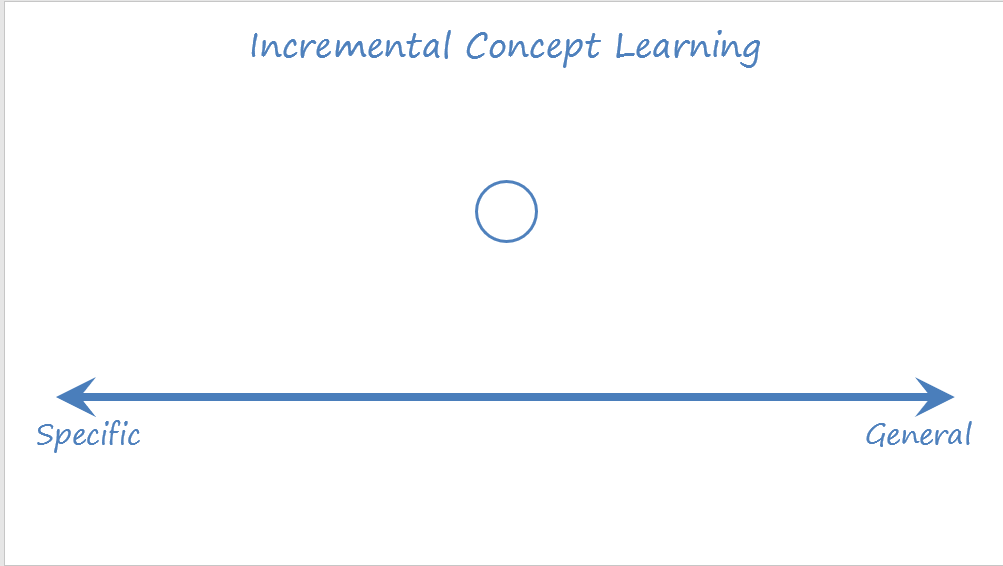

**VS** We take 2 models. A special model and general. 

> For every positive example, we generalize the special model. For every negative example, we specialize the  general model. 

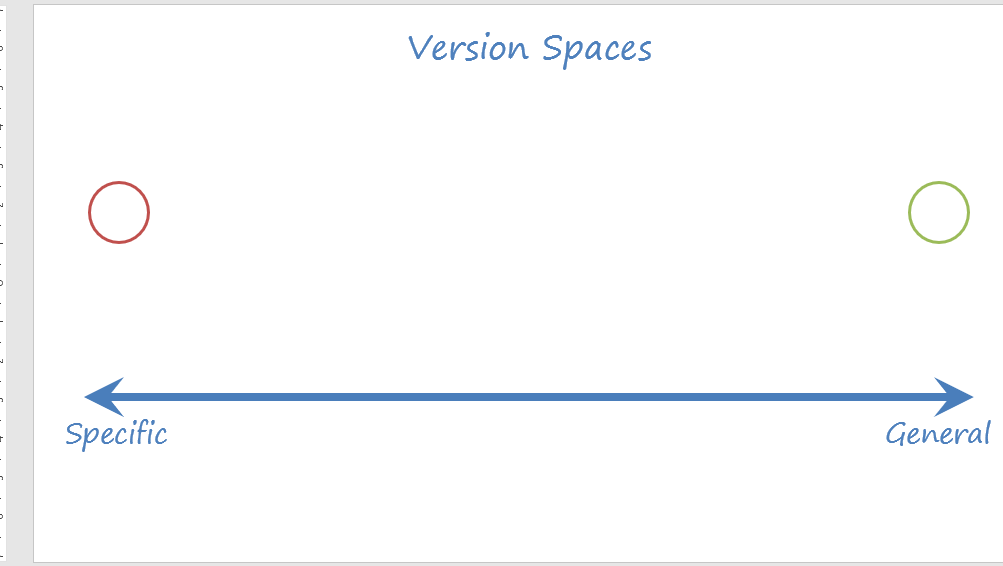

Note, Joyner called them as concept and also model interchangeably. 

## Generalizing & Specializing 

Suppose we have Frame 1 as shown below. The **only way to generalize** it further is to **make one of the specific attributes to any (indicated by ?)**. For example, any food instead of expensive food, is one generalization possibility. 

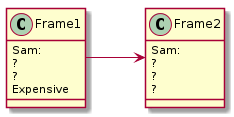

Similarly, the **only way to specialize is to make one of general attribute, specific**. For example, not any time, but only during lunch. 

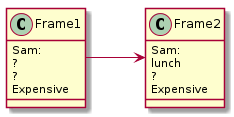

### Extreme Cases 

#### Specializing an extreme general model

So for an extreme generalized model, say G1, what could be possible specializations? One of the attributes could be a specific value. So if there are 4 slots, there could be 4 specializations (one step at a time specialization). 

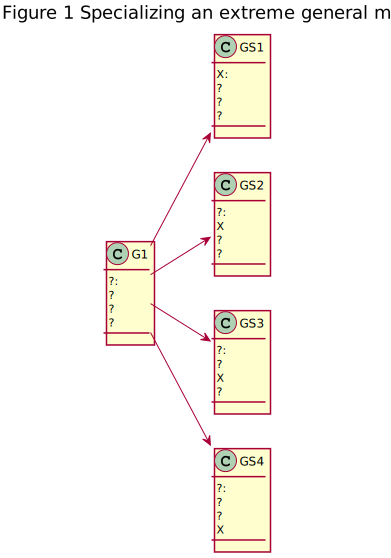

In [6]:
%%plantuml --jar

@startuml
left to right direction
title Figure 1 Specializing an extreme general model

class G1 {
    ?: 
    ?
    ?
    ?
}

class GS1 {
	X:
    ?
    ?
    ?
}

class GS2 {
	?:
    X
    ?
    ?
}

class GS3 {
	?:
    ?
    X
    ?
}

class GS4 {
	?:
    ?
    ?
    X
}


G1 --> GS1
G1 --> GS2
G1 --> GS3
G1 --> GS4

@enduml

#### Generalizing an extreme special model

Here again, generalizing one slot at a time, we could generalize an extreme 4 slot specialized model, in 4 ways. 

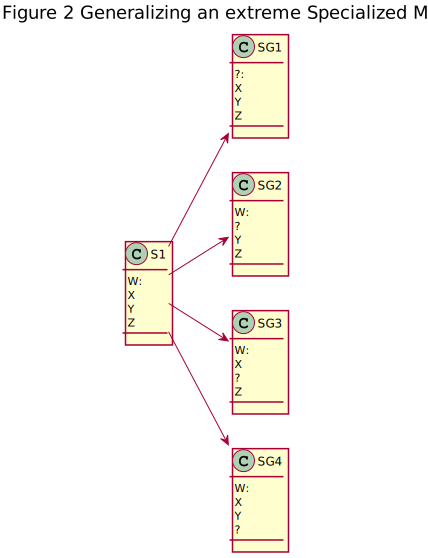

In [7]:
%%plantuml --jar

@startuml
left to right direction
title Figure 2 Generalizing an extreme Specialized Model

class S1 {
    W: 
    X
    Y
    Z
}

class SG1 {
	?:
    X
    Y
    Z
}

class SG2 {
	W:
    ?
    Y
    Z
}

class SG3 {
	W:
    X
    ?
    Z
}

class SG4 {
	W:
    X
    Y
    ?
}


S1 --> SG1
S1 --> SG2
S1 --> SG3
S1 --> SG4

@enduml

## Example

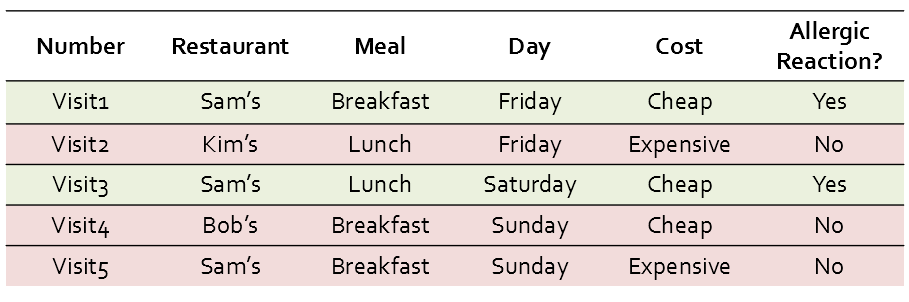

Looking at it in human eyes, one coudl guess, the allgeric reaction is only when subject visits Sam's. 

### Step 1 - Positive Example 

Establish the specific and generalized models initially from given positive example. 

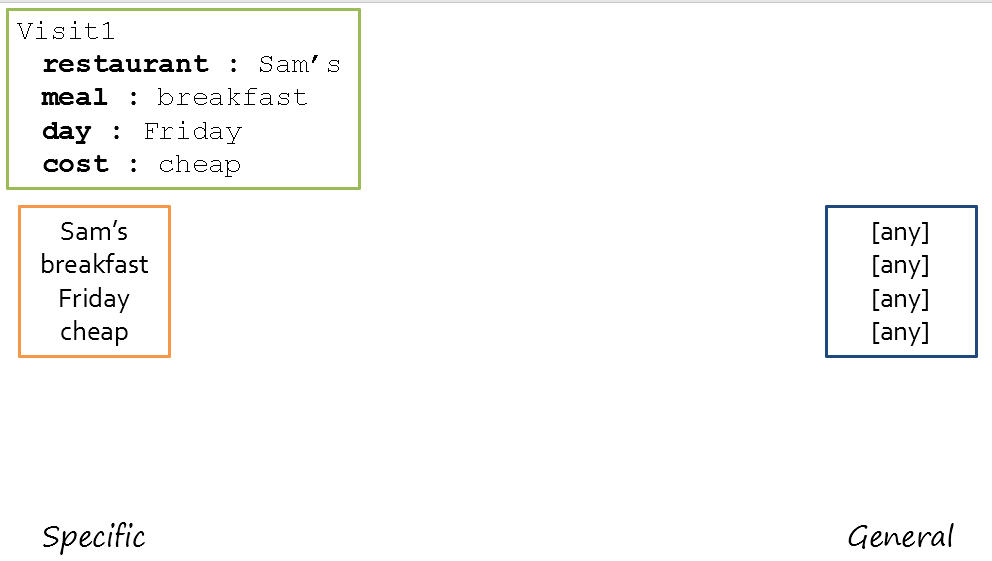

###  Step 2 - Negative Example

For negative example, specialize the general model. 

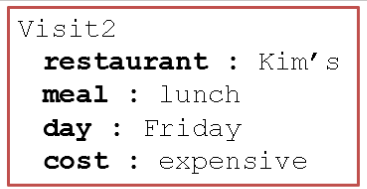

Before we get in to that, let us generalize the extreme specialized model once. We did similar one in Figure 2 above. There are many possibile comibinations. To be exact, 3+3+7+2 = 15 combinations possible. We have shown only 4 combinations below. (AI by Winston, Chapter 20)

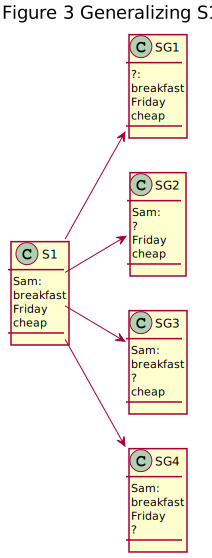

In [9]:
%%plantuml --jar

@startuml
left to right direction
title Figure 3 Generalizing S1

class S1 {
    Sam: 
    breakfast
    Friday
    cheap
}

class SG1 {
	?:
    breakfast
    Friday
    cheap
}

class SG2 {
	Sam:
    ?
    Friday
    cheap
}

class SG3 {
	Sam:
    breakfast
    ?
    cheap
}

class SG4 {
	Sam:
    breakfast
    Friday
    ?
}


S1 --> SG1
S1 --> SG2
S1 --> SG3
S1 --> SG4

@enduml

For the extreme general model G1, specializing would mean, specific value for each of its slots, so 4 specializations possible like in Figure 1, but what to fill up with? We want one single converged model, so the specialization of G1 should march towards the extreme specialized model S1. Thus, our first step could be specializing G1 with values from S1. This is without even looking at negative example. 

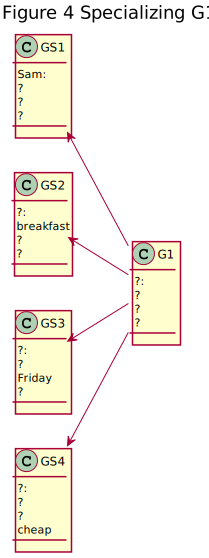

In [10]:
%%plantuml --jar

@startuml
left to right direction
title Figure 4 Specializing G1

class G1 {
    ?: 
    ?
    ?
    ?
}

class GS1 {
	Sam:
    ?
    ?
    ?
}

class GS2 {
	?:
    breakfast
    ?
    ?
}

class GS3 {
	?:
    ?
    Friday
    ?
}

class GS4 {
	?:
    ?
    ?
    cheap
}


GS1 <-- G1
GS2 <-- G1
GS3 <-- G1
GS4 <-- G1

@enduml

Compare Figure 3 and 4. If we had continued generalizing S1 in Figure 3, somewhere, the models would be equal to those we just derived in Figure 4. Thus, 

> **Each new specialization of G1, is a generalization of most specific model S1**

This ensures convergence and we would follow this in every step. So, in general

> **Each new specialization is a generalization of most specific model**


**Pruning:**  

Now **for given negative example, we do not want our model to select that as allergic combination** because it is not so; the given negative example does not produce allergic reaction. 


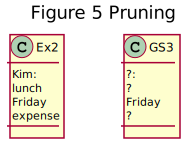

In [11]:
%%plantuml --jar

@startuml
left to right direction
title Figure 5 Pruning

class Ex2 {
	Kim:
    lunch
    Friday
    expense
}

class GS3 {
	?:
    ?
    Friday
    ?
}

Ex2 -[hidden]- GS3

@enduml

Because of the generality, GS3 can still allow Ex2 as a valid allergic combo. We do not want our model to allow that. So we prune GS3. No other GSX frame have this problem with Ex2, so the specialized models of G1 would be the rest 3 at this step. 

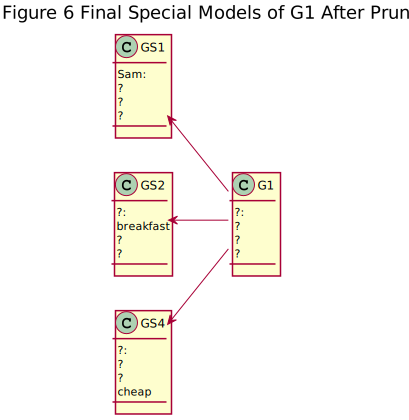

In [13]:
%%plantuml --jar

@startuml
left to right direction
title Figure 6 Final Special Models of G1 After Pruning

class G1 {
    ?: 
    ?
    ?
    ?
}

class GS1 {
	Sam:
    ?
    ?
    ?
}

class GS2 {
	?:
    breakfast
    ?
    ?
}

class GS4 {
	?:
    ?
    ?
    cheap
}


GS1 <-- G1
GS2 <-- G1
GS4 <-- G1

@enduml

This is what is illustrated below

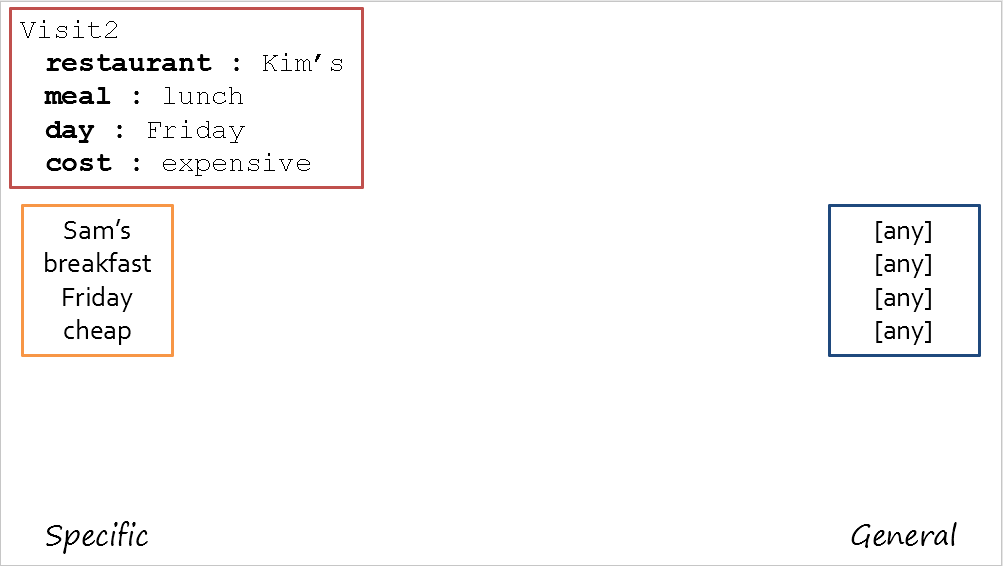

### Step 3 - Positive Example

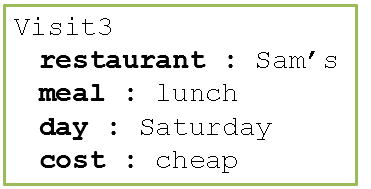

**Step 1:**  Generalize the latest specific models on left side. 

We have only S1. Trying to generalize it (specific slots take general values), we get Figure 3 as before. As earlier there are 15 combinations possible, but we could cut short by directly taking ones that is compatable with positive example. We want our model to select above example. Let us compare both exmaple and our S1. 

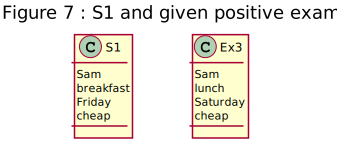

In [18]:
%%plantuml --jar

@startuml
left to right direction
title Figure 7 : S1 and given positive example

class S1 {
    Sam 
    breakfast
    Friday
    cheap
}

class Ex3 {
	Sam
    lunch
    Saturday
    cheap
}

S1 -[hidden]- Ex3 

@enduml

We want our new eneralized model SG1 to be able to select this positive example. So it should generalize as ```lunch/breakfast``` and ```Friday\Saturday```. In other words, simply by ? there. 

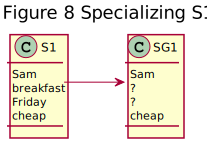

In [19]:
%%plantuml --jar

@startuml
left to right direction
title Figure 8 Specializing S1

class S1 {
    Sam 
    breakfast
    Friday
    cheap
}

class SG1 {
	Sam
    ?
    ?
    cheap
}

S1 --> SG1 

@enduml

**Step 2:**  Validate the latest specialized models on RHS

Now due to this new example, we should re valided GSX models with positive example. Because none of GSX should exclude this positive example. Do we have anything like that?

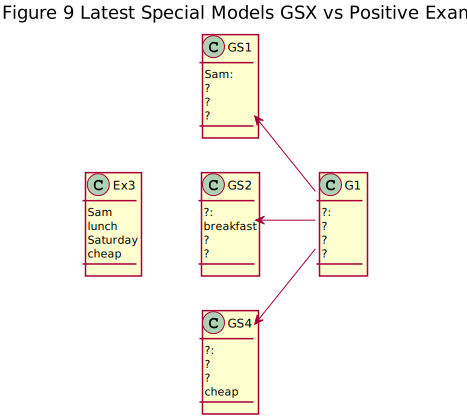

In [21]:
%%plantuml --jar

@startuml
left to right direction
title Figure 9 Latest Special Models GSX vs Positive Example 

class G1 {
    ?: 
    ?
    ?
    ?
}

class GS1 {
	Sam:
    ?
    ?
    ?
}

class GS2 {
	?:
    breakfast
    ?
    ?
}

class GS4 {
	?:
    ?
    ?
    cheap
}

class Ex3 {
	Sam
    lunch
    Saturday
    cheap
}


GS1 <-- G1
GS2 <-- G1
GS4 <-- G1

Ex3 -[hidden]- GS2

@enduml

Note **GS2 excludes Ex3**, whereas it should not. We want our model to select Ex3. So we prune out GS2 here. 

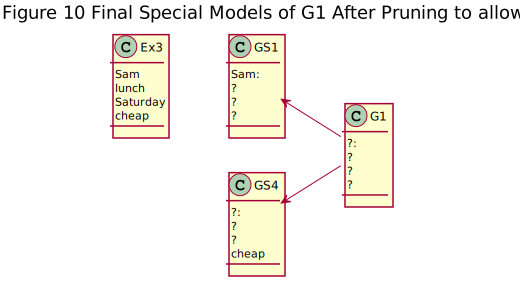

In [22]:
%%plantuml --jar

@startuml
left to right direction
title Figure 10 Final Special Models of G1 After Pruning to allow Ex3

class G1 {
    ?: 
    ?
    ?
    ?
}

class GS1 {
	Sam:
    ?
    ?
    ?
}

class GS4 {
	?:
    ?
    ?
    cheap
}

class Ex3 {
	Sam
    lunch
    Saturday
    cheap
}


GS1 <-- G1
GS4 <-- G1

Ex3 -[hidden]- GS1

@enduml

Note now both GS1 and GS4 allows Ex3. With this we are done at this step. This is illustrated below. 

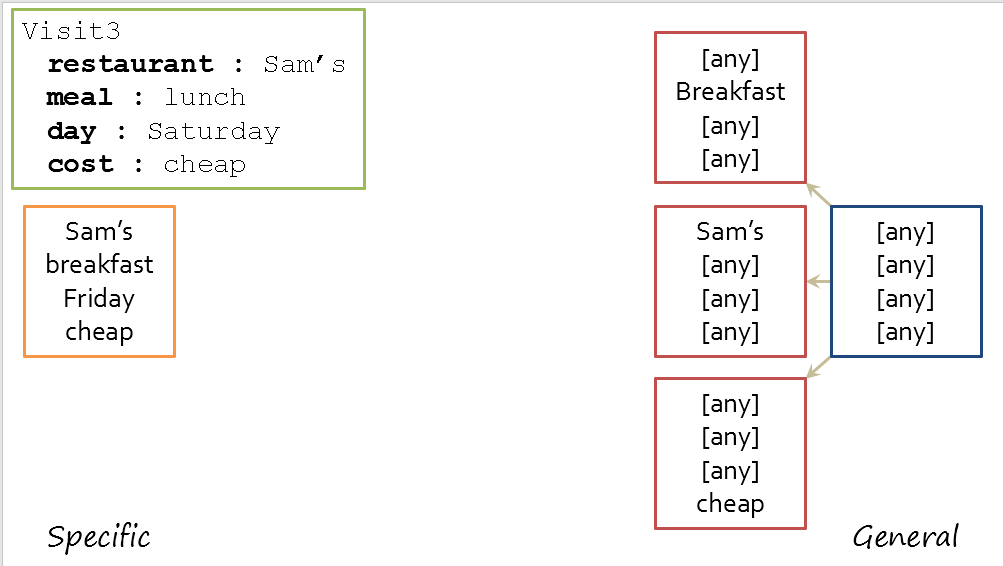

### Step 4 - Negative Example

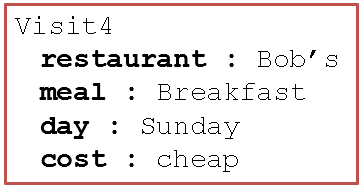

**Step 1**  We want to exclude this example in our RHS GSX models. Lwet us compare them. 

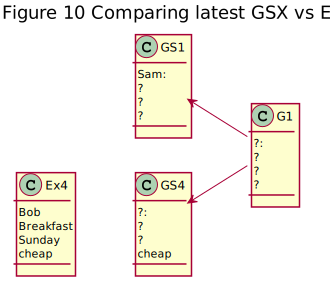

In [24]:
%%plantuml --jar

@startuml
left to right direction
title Figure 10 Comparing latest GSX vs Ex4

class G1 {
    ?: 
    ?
    ?
    ?
}

class GS1 {
	Sam:
    ?
    ?
    ?
}

class GS4 {
	?:
    ?
    ?
    cheap
}

class Ex4 {
	Bob
    Breakfast
    Sunday
    cheap
}


GS1 <-- G1
GS4 <-- G1

Ex4 -[hidden]- GS4

@enduml

GS1 already excludes Ex4. So its good there. GS4 includes Ex4. So we need to specialize it to exclude Ex4. We could do that as below. 

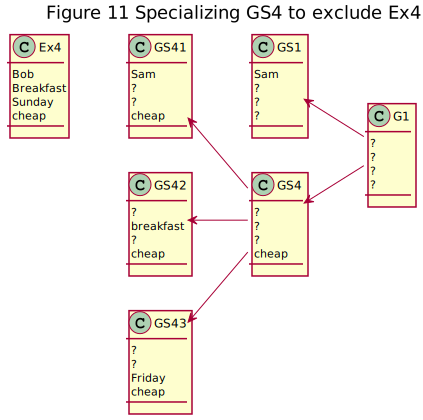

In [26]:
%%plantuml --jar

@startuml
left to right direction
title Figure 11 Specializing GS4 to exclude Ex4

class G1 {
    ? 
    ?
    ?
    ?
}

class GS1 {
	Sam
    ?
    ?
    ?
}

class GS4 {
	?
    ?
    ?
    cheap
}

class GS41 {
	Sam
    ?
    ?
    cheap
}

class GS42 {
	?
    breakfast
    ?
    cheap
}


class GS43 {
	?
    ?
    Friday
    cheap
}


class Ex4 {
	Bob
    Breakfast
    Sunday
    cheap
}


GS1 <-- G1
GS4 <-- G1

GS41 <-- GS4
GS42 <-- GS4
GS43 <-- GS4

Ex4 -[hidden]- GS41

@enduml

However there is a problem here. GS42 and GS43 contradicts with SG1, by being specific about breakfast and Friday. This cannot be true (Note if so, GS42 would exclude Ex3, a positive example where the day was Saturday. We cannot allow that). So we prune away GS42 and GS43. 

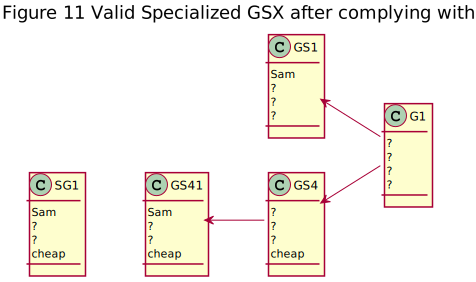

In [28]:
%%plantuml --jar

@startuml
left to right direction
title Figure 11 Valid Specialized GSX after complying with SG1

class G1 {
    ? 
    ?
    ?
    ?
}

class GS1 {
	Sam
    ?
    ?
    ?
}

class GS4 {
	?
    ?
    ?
    cheap
}

class GS41 {
	Sam
    ?
    ?
    cheap
}

class SG1 {
	Sam
    ?
    ?
    cheap
}



GS1 <-- G1
GS4 <-- G1

GS41 <-- GS4
SG1 -[hidden]- GS41


@enduml

Compare GS1 and GS41. GS1 **subsumes** GS41. So by rule, GS41 can be pruned away (Why not we do in other direction, that is remove more generalized GS1 instead of GS41 since we specialize from RHS?I do not know yet). 

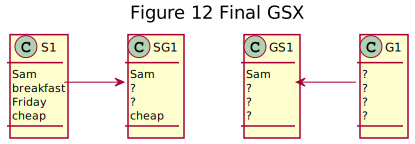

In [29]:
%%plantuml --jar

@startuml
left to right direction
title Figure 12 Final GSX 

class S1 {
    Sam 
    breakfast
    Friday
    cheap
}

class SG1 {
	Sam
    ?
    ?
    cheap
}


class G1 {
    ? 
    ?
    ?
    ?
}

class GS1 {
	Sam
    ?
    ?
    ?
}

S1 --> SG1 

GS1 <-- G1

SG1 -[hidden]- GS1


@enduml

This is illustrated below. 

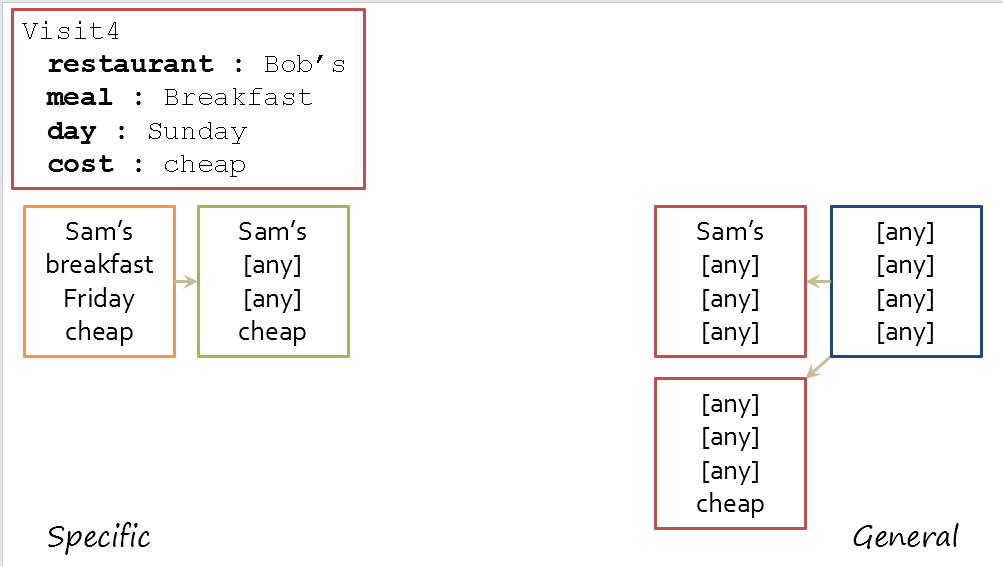

### Example 5 - Negative Example

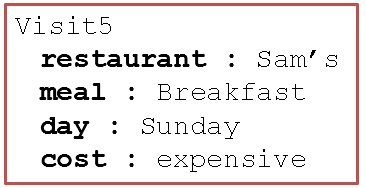

Again a negative example. As usual we got to most specialized general model, now the GS1, and specialize it further so as to avoid Ex5 negative example. However, at same time, should also ensure, the specialized model is inclusive of or not conflicting with most generalized special model SG1

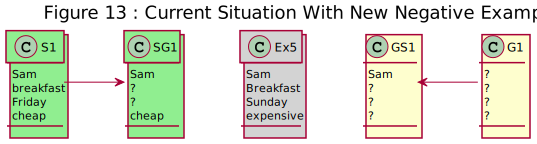

In [30]:
%%plantuml --jar

@startuml
left to right direction
title Figure 13 : Current Situation With New Negative Example



class S1 #LightGreen {
    Sam 
    breakfast
    Friday
    cheap
}

class SG1 #LightGreen {
	Sam
    ?
    ?
    cheap
}


class G1  {
    ? 
    ?
    ?
    ?
}

class GS1 {
	Sam
    ?
    ?
    ?
}

class Ex5 #LightGrey {
	Sam
    Breakfast
    Sunday
    expensive
}

S1 --> SG1 

GS1 <-- G1

SG1 -[hidden]- Ex5
Ex5 -[hidden]- GS1


@enduml

I have multiple  possibilties of specialization with 3 generalized slots in GS1, but I need to choose one that does not conflict with SG1. So the only specialization that cannot be in conflictw ould be one with ```cheap``` slot value, which also excludes Ex5 which is our priori requirement. 

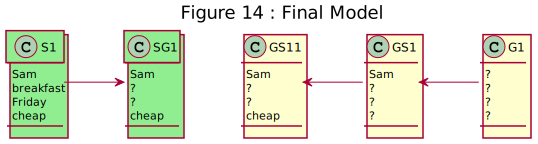

In [31]:
%%plantuml --jar

@startuml
left to right direction
title Figure 14 : Final Model



class S1 #LightGreen {
    Sam 
    breakfast
    Friday
    cheap
}

class SG1 #LightGreen {
	Sam
    ?
    ?
    cheap
}


class G1  {
    ? 
    ?
    ?
    ?
}

class GS1 {
	Sam
    ?
    ?
    ?
}

class GS11 {
	Sam
    ?
    ?
    cheap
}

S1 --> SG1 

GS1 <-- G1

SG1 -[hidden]-  GS11
GS11 <-- GS1


@enduml

GS11 and SG1 are now same, and thus converged. This is our final model. 

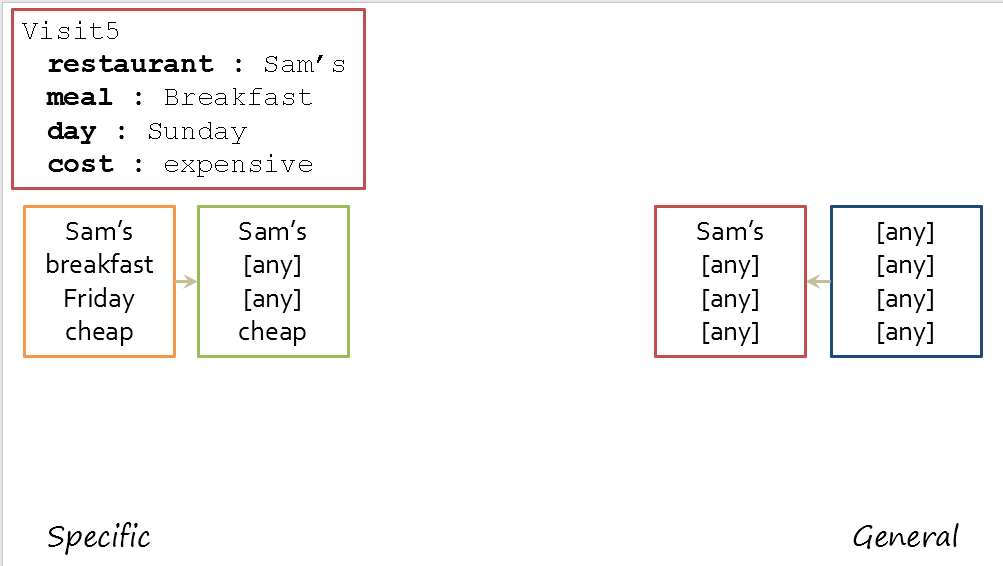

## Algorithm

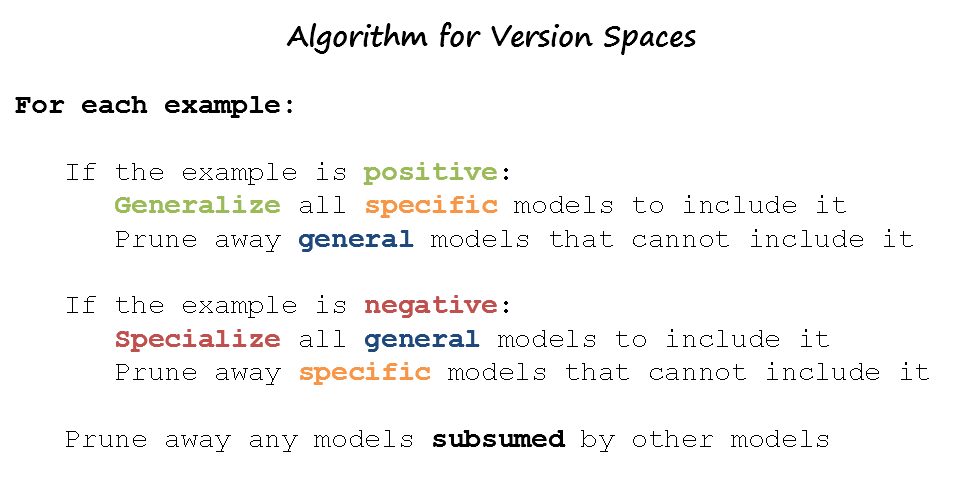

> **VS could have each example varying in many features as we saw above, not in ICP** 

## Quiz

### Step 1 - Positive Example

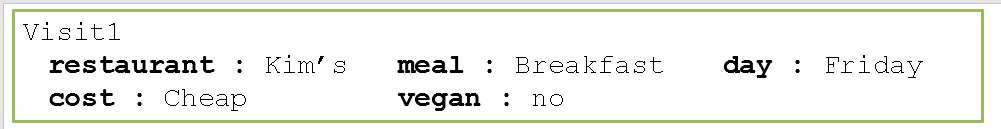

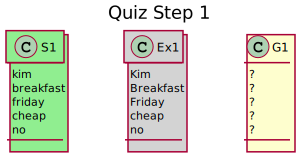

In [32]:
%%plantuml --jar

@startuml
left to right direction
title Quiz Step 1

class Ex1 #LightGrey {
	Kim
    Breakfast
    Friday
    cheap
    no
}


class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}


class G1  {
    ? 
    ?
    ?
    ?
    ?
}

S1 -[hidden]- Ex1
Ex1 -[hidden]- G1

@enduml

### Step 2 - Positive Example

We should generalize the most specialized S1. 

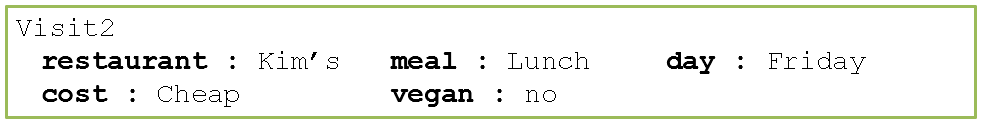

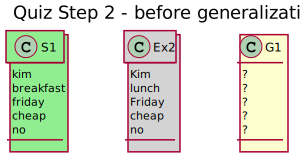

In [33]:
%%plantuml --jar

@startuml
left to right direction
title Quiz Step 2 - before generalization

class Ex2 #LightGrey {
	Kim
    lunch
    Friday
    cheap
    no
}


class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}


class G1  {
    ? 
    ?
    ?
    ?
    ?
}

S1 -[hidden]- Ex2
Ex2 -[hidden]- G1

@enduml

We need our model to generalize to include this 2nd positive example. So the only thing varying here to include is generalizing time - its lunch or breakfast.

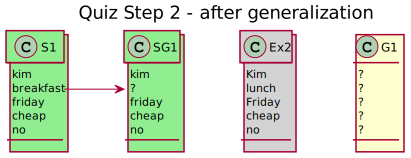

In [34]:
%%plantuml --jar

@startuml
left to right direction
title Quiz Step 2 - after generalization

class Ex2 #LightGrey {
	Kim
    lunch
    Friday
    cheap
    no
}


class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}

class SG1 #LightGreen {
    kim 
    ?
    friday
    cheap
    no
}


class G1  {
    ? 
    ?
    ?
    ?
    ?
}

S1 --> SG1
SG1 -[hidden]- Ex2
Ex2 -[hidden]- G1

@enduml

### Step 3 - Negative Example

We should specialize the most generalized G1

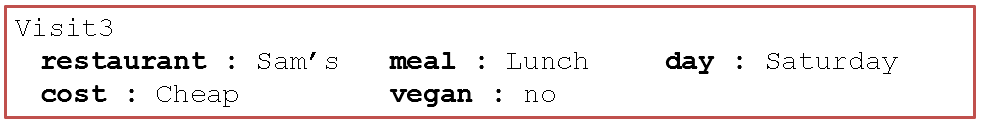

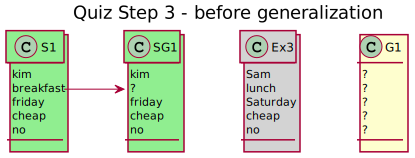

In [35]:
%%plantuml --jar

@startuml
left to right direction
title Quiz Step 3 - before generalization

class Ex3 #LightGrey {
	Sam
    lunch
    Saturday
    cheap
    no
}


class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}

class SG1 #LightGreen {
    kim 
    ?
    friday
    cheap
    no
}


class G1  {
    ? 
    ?
    ?
    ?
    ?
}

S1 --> SG1
SG1 -[hidden]- Ex3
Ex3 -[hidden]- G1

@enduml

Our GSX models should not include the given example. There are multiple possibiltiies filling up for G1, but we want only those that are not in conflict with SG1. Initially we see 4 possibilities which are those in compliant with SG1

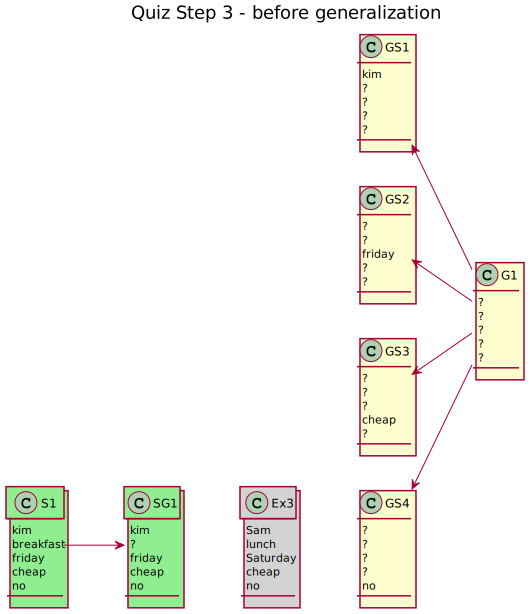

In [36]:
%%plantuml --jar

@startuml
left to right direction
title Quiz Step 3 - before generalization

class Ex3 #LightGrey {
	Sam
    lunch
    Saturday
    cheap
    no
}


class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}

class SG1 #LightGreen {
    kim 
    ?
    friday
    cheap
    no
}


class G1  {
    ? 
    ?
    ?
    ?
    ?
}


class GS1  {
    kim
    ?
    ?
    ?
    ?
}

class GS2  {
    ?
    ?
    friday
    ?
    ?
}

class GS3  {
    ?
    ?
    ?
    cheap
    ?
}

class GS4  {
    ?
    ?
    ?
    ?
    no
}

S1 --> SG1
SG1 -[hidden]- Ex3

GS1 <-- G1
GS2 <-- G1
GS3 <-- G1
GS4 <-- G1

Ex3 -[hidden]- GS4

@enduml

However, GS3, and GS4 would allow the negative example, so they should be pruned away. 

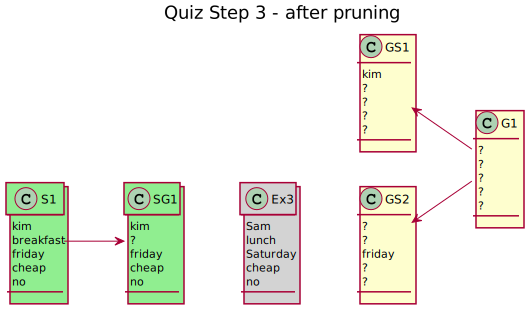

In [37]:
%%plantuml --jar

@startuml
left to right direction
title Quiz Step 3 - after pruning

class Ex3 #LightGrey {
	Sam
    lunch
    Saturday
    cheap
    no
}


class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}

class SG1 #LightGreen {
    kim 
    ?
    friday
    cheap
    no
}


class G1  {
    ? 
    ?
    ?
    ?
    ?
}


class GS1  {
    kim
    ?
    ?
    ?
    ?
}

class GS2  {
    ?
    ?
    friday
    ?
    ?
}


S1 --> SG1
SG1 -[hidden]- Ex3

GS1 <-- G1
GS2 <-- G1


Ex3 -[hidden]- GS2

@enduml

### Step 4 - Negative Example

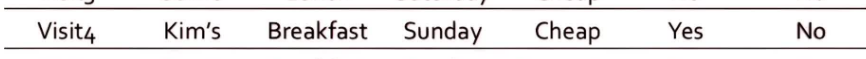

It is a negative example, so we should specialize the general models GS1 and GS2 such that, this example is not allowed. 

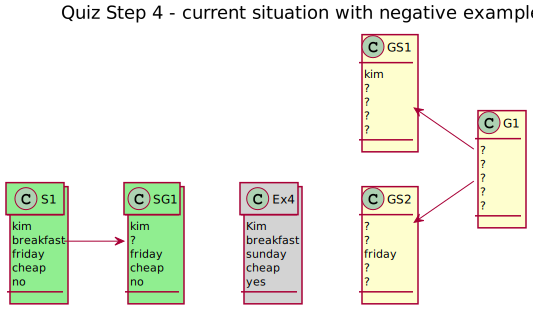

In [38]:
%%plantuml --jar 

@startuml
left to right direction
title Quiz Step 4 - current situation with negative example

class Ex4 #LightGrey {
	Kim
    breakfast
    sunday
    cheap
    yes
}


class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}

class SG1 #LightGreen {
    kim 
    ?
    friday
    cheap
    no
}


class G1  {
    ? 
    ?
    ?
    ?
    ?
}


class GS1  {
    kim
    ?
    ?
    ?
    ?
}

class GS2  {
    ?
    ?
    friday
    ?
    ?
}


S1 --> SG1


GS1 <-- G1
GS2 <-- G1

SG1 -[hidden]- Ex4
Ex4 -[hidden]- GS2

@enduml

Due to numerous possibilities, considering SG1 compliance in mind at same time, new GSXX models excluding Ex4, we get about 3 possibitlies finally. 

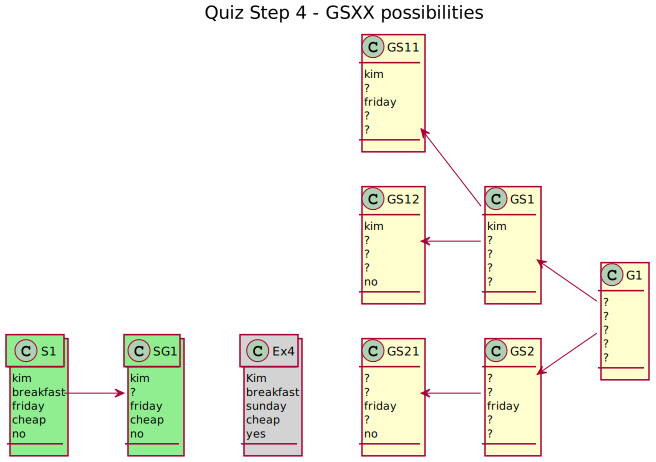

In [39]:
%%plantuml --jar

@startuml
left to right direction
title Quiz Step 4 - GSXX possibilities 

class Ex4 #LightGrey {
	Kim
    breakfast
    sunday
    cheap
    yes
}


class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}

class SG1 #LightGreen {
    kim 
    ?
    friday
    cheap
    no
}


class G1  {
    ? 
    ?
    ?
    ?
    ?
}


class GS1  {
    kim
    ?
    ?
    ?
    ?
}

class GS2  {
    ?
    ?
    friday
    ?
    ?
}

class GS11  {
    kim
    ?
    friday
    ?
    ?
}

class GS12  {
    kim
    ?
    ?
    ?
    no
}

class GS21  {
    ?
    ?
    friday
    ?
    no
}



S1 --> SG1


GS1 <-- G1

GS11 <-- GS1
GS12 <-- GS1

GS2 <-- G1

GS21 <-- GS2

SG1 -[hidden]- Ex4
Ex4 -[hidden]- GS21

@enduml

There seems to be no subsuming as well., so we proceed. 

### Step 5 - Negative Example

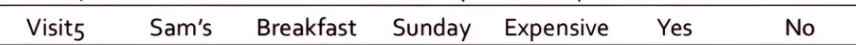

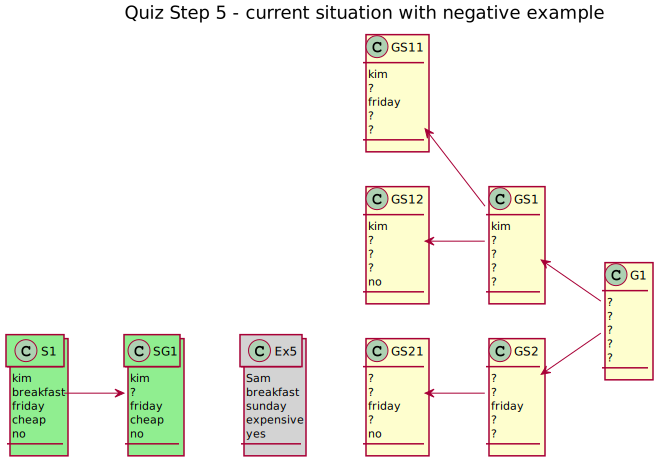

In [40]:
%%plantuml --jar

@startuml
left to right direction
title Quiz Step 5 - current situation with negative example

class Ex5 #LightGrey {
	Sam
    breakfast
    sunday
    expensive
    yes
}


class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}

class SG1 #LightGreen {
    kim 
    ?
    friday
    cheap
    no
}


class G1  {
    ? 
    ?
    ?
    ?
    ?
}


class GS1  {
    kim
    ?
    ?
    ?
    ?
}

class GS2  {
    ?
    ?
    friday
    ?
    ?
}

class GS11  {
    kim
    ?
    friday
    ?
    ?
}

class GS12  {
    kim
    ?
    ?
    ?
    no
}

class GS21  {
    ?
    ?
    friday
    ?
    no
}



S1 --> SG1


GS1 <-- G1

GS11 <-- GS1
GS12 <-- GS1

GS2 <-- G1

GS21 <-- GS2

SG1 -[hidden]- Ex5
Ex5 -[hidden]- GS21

@enduml

Again we should specialize all general models, such that, they exclude Ex5, but compliant with SG1. But none of above GSXX allow Ex5 anyway. So I decide to do nothing for this example. 

### Step 6 - Positive Example

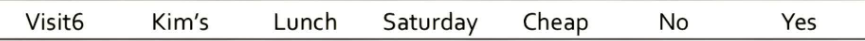

We have to now generalize the most specfic model SG1. At same time, the GSXX should allow this model. 

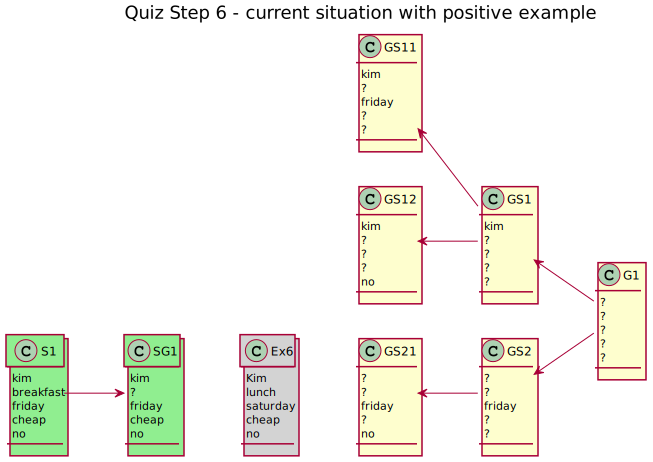

In [46]:
%%plantuml --jar

@startuml
left to right direction
title Quiz Step 6 - current situation with positive example

class Ex6 #LightGrey {
	Kim
    lunch
    saturday
    cheap
    no
}


class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}

class SG1 #LightGreen {
    kim 
    ?
    friday
    cheap
    no
}


class G1  {
    ? 
    ?
    ?
    ?
    ?
}


class GS1  {
    kim
    ?
    ?
    ?
    ?
}

class GS2  {
    ?
    ?
    friday
    ?
    ?
}

class GS11  {
    kim
    ?
    friday
    ?
    ?
}


class GS12  {
    kim
    ?
    ?
    ?
    no
}


class GS21  {
    ?
    ?
    friday
    ?
    no
}



S1 --> SG1

GS1 <-- G1
GS11 <-- GS1
GS12 <-- GS1
GS2 <-- G1
GS21 <-- GS2



SG1 -[hidden]- Ex6
Ex6 -[hidden]- GS21

@enduml

**Generalizing SG1** 

* Between SG1 and Ex5, the only generalization we see is it could be friday/saturday. 

**Checking if GSXX allows this model**

* Comparing Ex5 and GS11, GS11 would not allow this example, so we prune it (generalizing it would mean going backwards to GS1)
* Comparing Ex5 and GS12, GS12 will allow this example, so shall remain
* Comparing Ex5 and GS21, GS21 will not allow this example so we prune it

Combining the observations, we get,

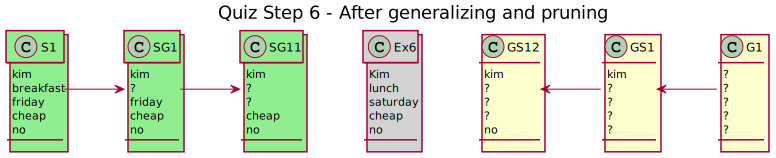

In [47]:
%%plantuml --jar

@startuml
left to right direction
title Quiz Step 6 - After generalizing and pruning

class Ex6 #LightGrey {
	Kim
    lunch
    saturday
    cheap
    no
}


class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}

class SG1 #LightGreen {
    kim 
    ?
    friday
    cheap
    no
}

class SG11 #LightGreen {
    kim 
    ?
    ?
    cheap
    no
}



class G1  {
    ? 
    ?
    ?
    ?
    ?
}


class GS1  {
    kim
    ?
    ?
    ?
    ?
}




class GS12  {
    kim
    ?
    ?
    ?
    no
}






S1 --> SG1
SG1 --> SG11

GS1 <-- G1

GS12 <-- GS1





SG11 -[hidden]- Ex6
Ex6 -[hidden]- GS12

@enduml

### Step 7 - Negative example. 

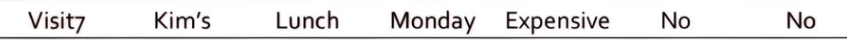

This is a negative example, so we should specialize GS12, and prune as necessary. Also make GS12X models complaint with SG11. 

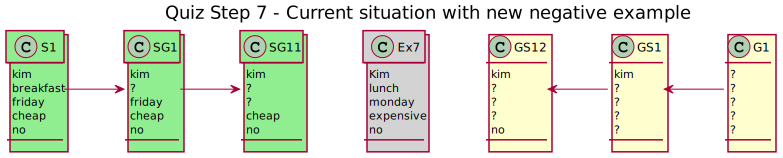

In [48]:
%%plantuml --jar

@startuml
left to right direction
title Quiz Step 7 - Current situation with new negative example

class Ex7 #LightGrey {
	Kim
    lunch
    monday
    expensive
    no
}


class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}

class SG1 #LightGreen {
    kim 
    ?
    friday
    cheap
    no
}

class SG11 #LightGreen {
    kim 
    ?
    ?
    cheap
    no
}



class G1  {
    ? 
    ?
    ?
    ?
    ?
}


class GS1  {
    kim
    ?
    ?
    ?
    ?
}




class GS12  {
    kim
    ?
    ?
    ?
    no
}






S1 --> SG1
SG1 --> SG11

GS1 <-- G1

GS12 <-- GS1





SG11 -[hidden]- Ex7
Ex7 -[hidden]- GS12

@enduml

Comparing GS12 with Ex7, in current form it allows. So we could have one of 3 general slots of GS12 to have a value specialized, so as to exclude Ex7. Looking at SG11, that specialized value could only be cheap, because the SG11 suggests it could be breakfast/lunch and any day. We should not create a conflict for that. 

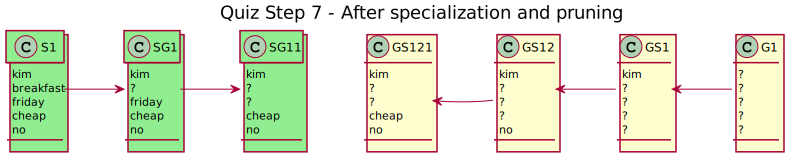

In [49]:
%%plantuml --jar

@startuml
left to right direction
title Quiz Step 7 - After specialization and pruning



class S1 #LightGreen {
    kim 
    breakfast
    friday
    cheap
    no
}

class SG1 #LightGreen {
    kim 
    ?
    friday
    cheap
    no
}

class SG11 #LightGreen {
    kim 
    ?
    ?
    cheap
    no
}



class G1  {
    ? 
    ?
    ?
    ?
    ?
}


class GS1  {
    kim
    ?
    ?
    ?
    ?
}




class GS12  {
    kim
    ?
    ?
    ?
    no
}


class GS121  {
    kim
    ?
    ?
    cheap
    no
}





S1 --> SG1
SG1 --> SG11

GS1 <-- G1

GS12 <-- GS1
GS121 <-- GS12




SG11 -[hidden]- GS121
GS121 -[hidden]- GS12

@enduml

Now GS121 and SG11 are the same! That should be our converged final model. 

That's right!  :) 

## Identification Trees

* Pick one feature and create tree based on end result binary. Here, restaurant for example. 
* For new example, one has to find the path that is closest to end result.
* Also **Decision tree learning** - easy but trade off is that to know all 5 examples initially

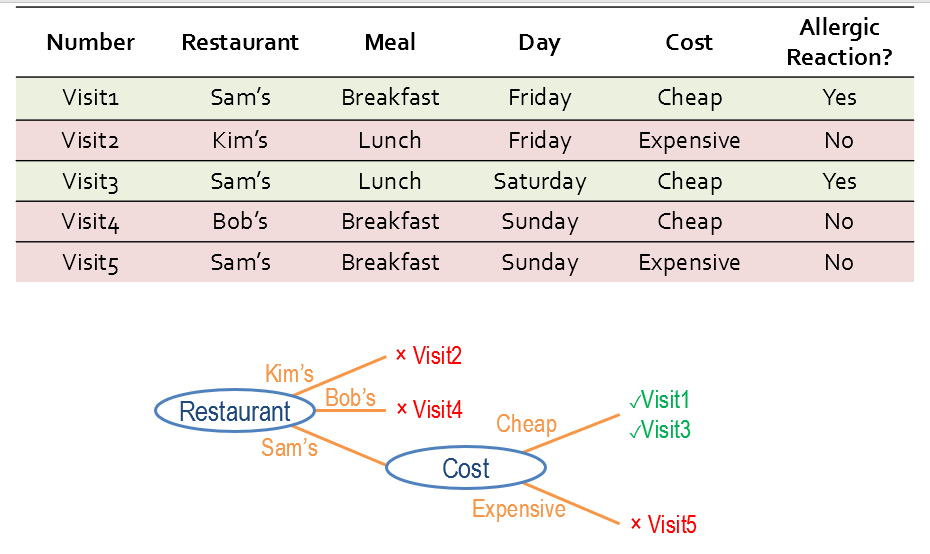

## Optimal Decision Trees

* One could have choosen any feature resulting in different tree possibilities. Clearly one could be most optimal as illustrated below. 

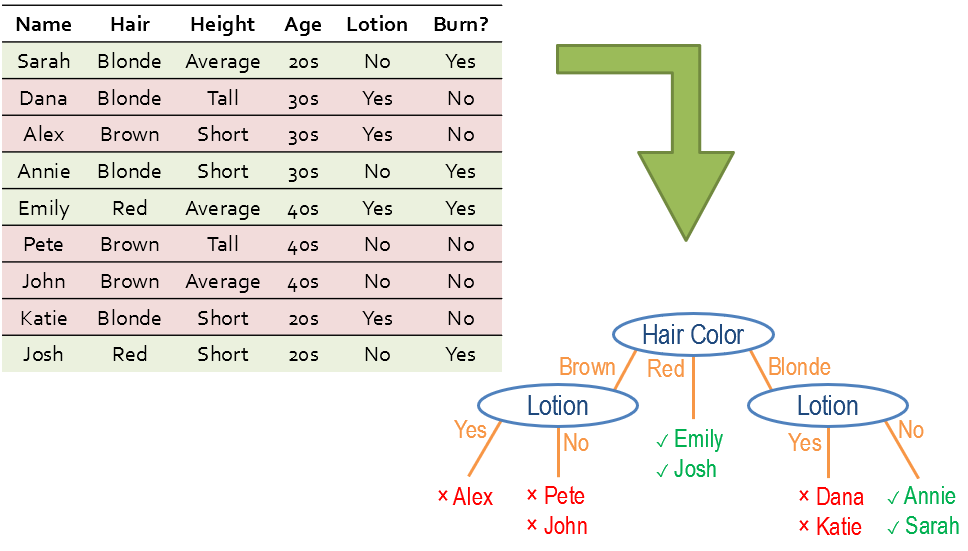

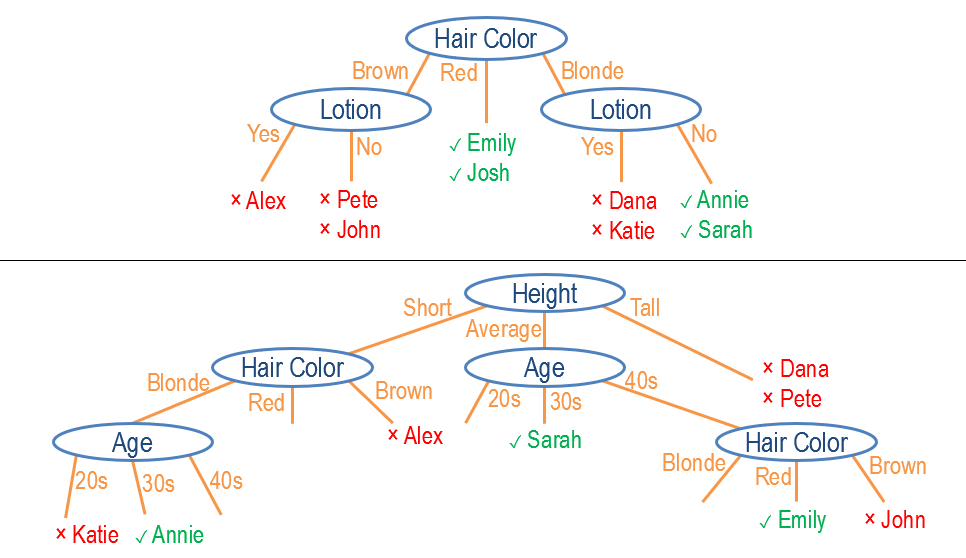